## Observations and Insights 

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
study_results_no_duplicates = study_results.drop_duplicates(subset=['Mouse ID','Timepoint'])

# Use the cleaned data for the remaining steps.

# Combine the data into a single dataset
study_results_combined = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Remove non numeric values. Some values exist in mouse_metadata and not in study_results
study_results_combined_nonna = study_results_combined.dropna(how="any")

# Display the data table for preview
study_results_combined_nonna

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [190]:
# Checking the number of mice.
number_of_mice = study_results_combined_nonna['Mouse ID'].nunique()
print(f'number of mice = {number_of_mice}')

number of mice = 249


In [191]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = study_results.groupby(['Mouse ID','Timepoint'])
duplicate_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [192]:
# Optional: Get all the data for the duplicate mouse ID. 

study_results_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [193]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_combined_nonna

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [194]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = study_results_combined_nonna['Mouse ID'].nunique()
print(f'number of mice = {number_of_mice}')

number of mice = 249


## Summary Statistics

In [195]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM for All Data
# SEM standard error of the mean.

study_results_combined_stat = pd.DataFrame([], columns=['ST', 'Age_months','Metastatic Sites','Timepoint','Tumor Volume (mm3)','Weight (g)'])
study_results_combined_stat

# mean for 
Age_months_mean = study_results_combined_nonna['Age_months'].mean()
Weight_mean = study_results_combined_nonna['Weight (g)'].mean()
Timepoint_mean = study_results_combined_nonna['Timepoint'].mean()
Tumor_Volume_mean = study_results_combined_nonna['Tumor Volume (mm3)'].mean()
Metastatic_Sites_mean = study_results_combined_nonna['Metastatic Sites'].mean()

#Create dataframe 
mean_df = pd.DataFrame([['mean',Age_months_mean, Weight_mean, Timepoint_mean, Tumor_Volume_mean, Metastatic_Sites_mean]], columns=['ST','Age_months','Metastatic Sites','Timepoint','Tumor Volume (mm3)','Weight (g)'])
study_results_combined_stat = study_results_combined_stat.append(mean_df)

# median for 
Age_months_median = study_results_combined_nonna['Age_months'].median()
Weight_median = study_results_combined_nonna['Weight (g)'].median()
Timepoint_median = study_results_combined_nonna['Timepoint'].median()
Tumor_Volume_median = study_results_combined_nonna['Tumor Volume (mm3)'].median()
Metastatic_Sites_median = study_results_combined_nonna['Metastatic Sites'].median()

#Create dataframe 
median_df = pd.DataFrame([['median',Age_months_median, Weight_median, Timepoint_median, Tumor_Volume_median, Metastatic_Sites_median]], columns=['ST','Age_months','Metastatic Sites','Timepoint','Tumor Volume (mm3)','Weight (g)'])
study_results_combined_stat = study_results_combined_stat.append(median_df)

# variance for 
Age_months_var = study_results_combined_nonna['Age_months'].var()
Weight_var = study_results_combined_nonna['Weight (g)'].var()
Timepoint_var = study_results_combined_nonna['Timepoint'].var()
Tumor_Volume_var = study_results_combined_nonna['Tumor Volume (mm3)'].var()
Metastatic_Sites_var = study_results_combined_nonna['Metastatic Sites'].var()

#Create dataframe 
variance_df = pd.DataFrame([['variance',Age_months_var, Weight_var, Timepoint_var, Tumor_Volume_var, Metastatic_Sites_var]], columns=['ST','Age_months','Metastatic Sites','Timepoint','Tumor Volume (mm3)','Weight (g)'])
study_results_combined_stat = study_results_combined_stat.append(variance_df)

# std for 
Age_months_std = study_results_combined_nonna['Age_months'].std()
Weight_std = study_results_combined_nonna['Weight (g)'].std()
Timepoint_std = study_results_combined_nonna['Timepoint'].std()
Tumor_Volume_std = study_results_combined_nonna['Tumor Volume (mm3)'].std()
Metastatic_Sites_std = study_results_combined_nonna['Metastatic Sites'].std()

#Create dataframe 
std_df = pd.DataFrame([['std',Age_months_std, Weight_std, Timepoint_std, Tumor_Volume_std, Metastatic_Sites_std]], columns=['ST','Age_months','Metastatic Sites','Timepoint','Tumor Volume (mm3)','Weight (g)'])
study_results_combined_stat = study_results_combined_stat.append(std_df)


# SEM for 
Age_months_SEM = st.sem(study_results_combined_nonna['Age_months'])
Weight_SEM = st.sem(study_results_combined_nonna['Weight (g)'])
Timepoint_SEM = st.sem(study_results_combined_nonna['Timepoint'])
Tumor_Volume_SEM = st.sem(study_results_combined_nonna['Tumor Volume (mm3)'])
Metastatic_Sites_SEM = st.sem(study_results_combined_nonna['Metastatic Sites'])

#Create dataframe 
sem_df = pd.DataFrame([['sem',Age_months_SEM, Weight_SEM, Timepoint_SEM, Tumor_Volume_SEM, Metastatic_Sites_SEM]], columns=['ST','Age_months','Metastatic Sites','Timepoint','Tumor Volume (mm3)','Weight (g)'])
study_results_combined_stat = study_results_combined_stat.append(sem_df)

study_results_combined_stat


,ST,Age_months,Metastatic Sites,Timepoint,Tumor Volume (mm3),Weight (g)
0,mean,12.814580,25.662441,19.572108,50.448381,1.021659
0,median,13.000000,27.000000,20.000000,48.951474,1.000000
0,variance,51.690231,15.379122,198.231188,79.116074,1.294985
0,std,7.189592,3.921622,14.079460,8.894722,1.137974
0,sem,0.165245,0.090134,0.323602,0.204436,0.026155


In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# study_results_combined_nonna.describe()

study_results_combined_nonna_gb_regime = study_results_combined_nonna.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem', 'count']})
study_results_combined_nonna_gb_regime

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                    
             count  
Drug Regimen        
Capomulin      230  
Ceftamin       178  
Infubinol      178  
Ketapril       188  
Naftisol       186  
Placebo        181  
Propriva       161  
Ramicane       228  
Stelasyn       181  
Zoniferol      182

In [149]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
study_results_combined_nonna_gb_regime = study_results_combined_nonna.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem', 'count']})
study_results_combined_nonna_gb_regime

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                    
             count  
Drug Regimen        
Capomulin      230  
Ceftamin       178  
Infubinol      178  
Ketapril       188  
Naftisol       186  
Placebo        181  
Propriva       161  
Ramicane       228  
Stelasyn       181  
Zoniferol      182

In [150]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
study_results_combined_nonna_gb_regime = study_results_combined_nonna.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem', 'count']})
study_results_combined_nonna_gb_regime


Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                    
             count  
Drug Regimen        
Capomulin      230  
Ceftamin       178  
Infubinol      178  
Ketapril       188  
Naftisol       186  
Placebo        181  
Propriva       161  
Ramicane       228  
Stelasyn       181  
Zoniferol      182

## Bar and Pie Charts

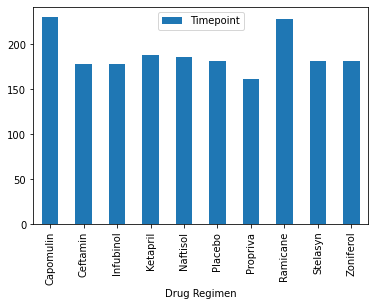

In [199]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
study_results_combined_nonna.groupby('Drug Regimen')['Timepoint'].count().plot.bar(legend=True)


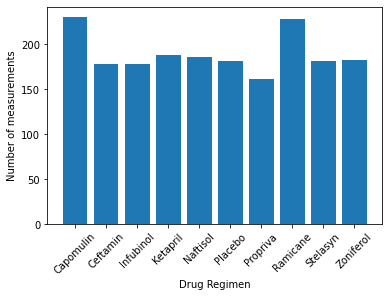

In [294]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

using_pyplot_df = study_results_combined_nonna.groupby('Drug Regimen', as_index=False)['Timepoint'].count()
plt.bar(using_pyplot_df['Drug Regimen'],using_pyplot_df['Timepoint'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of measurements')
plt.xticks(rotation=45)
plt.show()


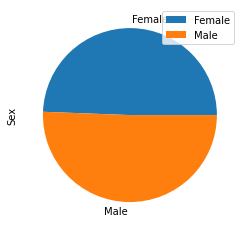

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
study_results_combined_nonna.groupby('Sex')['Sex'].count().plot.pie(legend=True)


([<matplotlib.patches.Wedge at 0x21d9123ed30>,
 [Text(0.02290091287918425, 1.1997814585120492, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.01335886584619081, 0.699872517465362, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

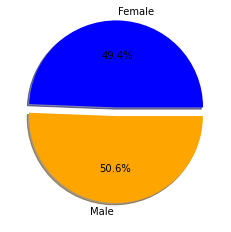

In [302]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# study_results_combined_nonna.groupby('Sex', as_index=False)['Sex'].count().plot.pie(legend=True)
pie_using_pyplot_df = study_results_combined_nonna.groupby('Sex', as_index=False).count()

# Labels for the sections of our pie chart
my_labels = pie_using_pyplot_df["Sex"]

# The values of each section of the pie chart
values = pie_using_pyplot_df["Timepoint"]

# The colors of each section of the pie chart
my_colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(values, explode=explode, labels=my_labels, colors=my_colors, autopct="%1.1f%%", shadow=True, startangle=0)


## Quartiles, Outliers and Boxplots

In [215]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df = study_results_combined_nonna[study_results_combined_nonna['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
df2 = df.groupby(['Mouse ID'])[['Timepoint']].max()
df2
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(study_results_combined_nonna,df2, on="Mouse ID")
merged_df
#
result_df = merged_df[merged_df["Timepoint_x"] == merged_df["Timepoint_y"]]
result_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3,45
783,y163,Infubinol,Female,17,27,45,67.685569,3,45
793,y769,Ceftamin,Female,6,27,45,68.594745,4,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [237]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_treatments = result_df['Drug Regimen'].unique()
list_of_treatments
# Create empty list to fill with tumor vol data (for plotting)
list_of_tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
result_df[['Tumor Volume (mm3)']]

quartiles = result_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of result_df is: {lowerq}")
print(f"The upper quartile of result_df is: {upperq}")
print(f"The interquartile range of result_df is: {iqr}")
print(f"The the median of result_df is: {quartiles[0.5]} ")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

The lower quartile of result_df is: 37.187743802499995
The upper quartile of result_df is: 59.930261755000004
The interquartile range of result_df is: 22.74251795250001
The the median of result_df is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


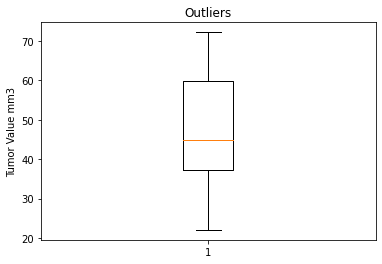

In [239]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
result_df[['Tumor Volume (mm3)']]

fig1, ax1 = plt.subplots()
ax1.set_title('Outliers')
ax1.set_ylabel('Tumor Value mm3')
ax1.boxplot(result_df['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

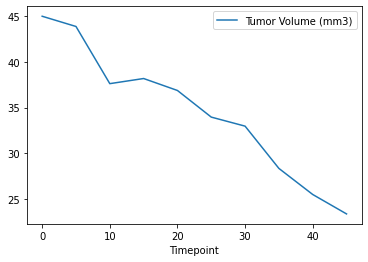

In [253]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_treated_with_Capomulin_df2 = study_results_combined_nonna[study_results_combined_nonna['Drug Regimen'].isin(['Capomulin'])]
mouse_treated_with_Capomulin_df = mouse_treated_with_Capomulin_df2[mouse_treated_with_Capomulin_df2["Mouse ID"] == "s185"]
mouse_treated_with_Capomulin_df
mouse_treated_with_Capomulin_df.groupby('Timepoint')['Tumor Volume (mm3)'].sum().plot(legend=True)

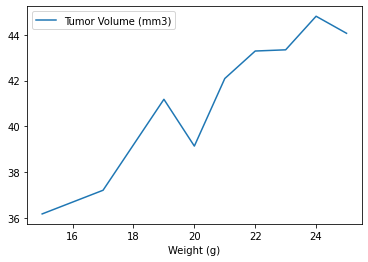

In [254]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_treated_with_Capomulin_df2 = study_results_combined_nonna[study_results_combined_nonna['Drug Regimen'].isin(['Capomulin'])]
mouse_treated_with_Capomulin_df2.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().plot(legend=True)


## Correlation and Regression

In [287]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
to_correlate_df = pd.DataFrame([], columns=['Weight (g)','Tumor Volume (mm3)'])
to_correlate_df = mouse_treated_with_Capomulin_df2.groupby('Weight (g)', as_index=False)[['Tumor Volume (mm3)']].mean()

mouse_weight = to_correlate_df['Weight (g)']
average_tumor_volume = to_correlate_df['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.95
